In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

2024-01-04 17:18:03.420114: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-04 17:18:03.424534: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 17:18:03.508028: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 17:18:03.508105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 17:18:03.510117: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

*Chargement du Jeu de données* 

In [2]:
dataset = pd.read_csv("./MINI_1_LSTM_16notes.csv")
df = dataset.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = np.array([ eval(k) for k in df_train['X']])
X_test = np.array([ eval(k) for k in df_valid['X']])
y_train = np.array([ eval(k) for k in df_train['Y']])
y_test = np.array([ eval(k) for k in df_valid['Y']])

nombreDeNotesPrecedentes = len(X_train[0]) # nombre de notes précédentes à prendre en compte
formatNote = len(X_train[0][0]) # valeur de la note, durée, durée avant prochaine note

*Compilation des modèles*

20 neurones

2024-01-03 16:58:50.481352: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-03 16:58:50.482478: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
342/342 [==============================] - 10s 21ms/step - loss: 48582.2344 - mae: 86.7286 - val_loss: 55812.8320 - val_mae: 91.9121
Epoch 2/20
342/342 [==============================] - 6s 18ms/step - loss: 48051.0156 - mae: 85.6030 - val_loss: 49315.2344 - val_mae: 81.0226
Epoch 3/20
342/342 [==============================] - 6s 18ms/step - loss: 43072.4023 - mae: 76.9205 - val_loss: 46334.0703 - val_mae: 79.0312
Epoch 4/20
342/342 [==============================] - 6s 19ms/step - loss: 41610.8594 - mae: 73.7241 - val_loss: 46514.2734 - val_mae: 75.4068
Epoch 5/20
342/342 [==============================] - 6s 19ms/step - loss: 41269.5664 - mae: 72.5837 - val_loss: 47790.0977 - val_mae: 74.8587
Epoch 6/20
342/342 [==============================] - 6s 18ms/step - loss: 40851.8984 - mae: 71.8318 - val_loss: 45816.7695 - val_mae: 73.5261
Epoch 7/20
342/342 [==============================] - 6s 19ms/step - loss: 40210.6914 - mae: 71.1513 - val_loss: 47597.8555 - val_mae: 74.623

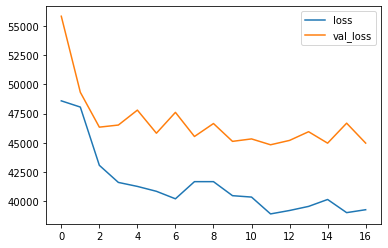

In [3]:
nombreDeNeurones = 20
batchNormalisation=False
dropout=False
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 20          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
if dropout:
    model.add( Dropout(0.2) ) 
if batchNormalisation:
    model.add( BatchNormalization() )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))

Epoch 1/100
342/342 [==============================] - 7s 15ms/step - loss: 66133.6641 - mae: 102.0687 - val_loss: 65822.3906 - val_mae: 103.3418
Epoch 2/100
342/342 [==============================] - 5s 14ms/step - loss: 64894.8164 - mae: 97.9148 - val_loss: 64169.9453 - val_mae: 98.1684
Epoch 3/100
342/342 [==============================] - 4s 12ms/step - loss: 62832.7656 - mae: 90.9603 - val_loss: 61433.9023 - val_mae: 87.1632
Epoch 4/100
342/342 [==============================] - 4s 12ms/step - loss: 60138.5547 - mae: 82.1764 - val_loss: 59006.5586 - val_mae: 77.9181
Epoch 5/100
342/342 [==============================] - 5s 14ms/step - loss: 57773.2148 - mae: 74.4618 - val_loss: 59254.3906 - val_mae: 86.4732
Epoch 6/100
342/342 [==============================] - 5s 14ms/step - loss: 55220.3008 - mae: 69.2563 - val_loss: 53190.9648 - val_mae: 69.3569
Epoch 7/100
342/342 [==============================] - 5s 14ms/step - loss: 52930.5938 - mae: 66.7226 - val_loss: 51128.8320 - val_mae

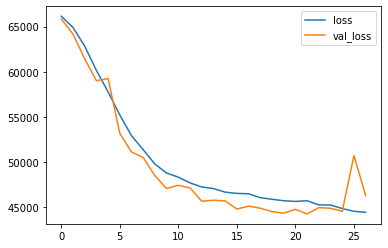

In [4]:
nombreDeNeurones = 20
batchNormalisation=True
dropout=False
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 100          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
if dropout:
    model.add( Dropout(0.2) ) 
if batchNormalisation:
    model.add( BatchNormalization() )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))

Epoch 1/20
342/342 [==============================] - 2s 4ms/step - loss: 49244.2031 - mae: 82.2087 - val_loss: 45806.4805 - val_mae: 72.2750
Epoch 2/20
342/342 [==============================] - 2s 5ms/step - loss: 44861.1523 - mae: 72.7817 - val_loss: 43533.8711 - val_mae: 69.8503
Epoch 3/20
342/342 [==============================] - 1s 4ms/step - loss: 43893.8477 - mae: 71.1329 - val_loss: 42795.1328 - val_mae: 69.0182
Epoch 4/20
342/342 [==============================] - 3s 8ms/step - loss: 41425.0156 - mae: 70.6436 - val_loss: 43059.2070 - val_mae: 67.6330
Epoch 5/20
342/342 [==============================] - 1s 4ms/step - loss: 40983.4883 - mae: 68.2768 - val_loss: 43303.3320 - val_mae: 67.2798
Epoch 6/20
342/342 [==============================] - 2s 7ms/step - loss: 40712.1523 - mae: 67.4234 - val_loss: 43319.1680 - val_mae: 67.5965
Epoch 7/20
342/342 [==============================] - 2s 5ms/step - loss: 39831.8750 - mae: 68.6052 - val_loss: 43131.3164 - val_mae: 65.7211
Epoch 

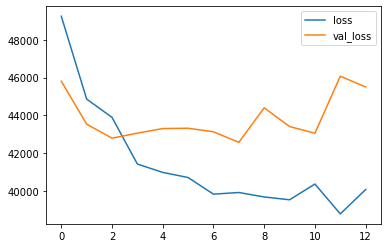

In [5]:
nombreDeNeurones = 20
batchNormalisation=False
dropout=True
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 20          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
if dropout:
    model.add( Dropout(0.2) ) 
if batchNormalisation:
    model.add( BatchNormalization() )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))

Epoch 1/100
342/342 [==============================] - 8s 17ms/step - loss: 66212.5781 - mae: 102.0342 - val_loss: 66010.2891 - val_mae: 104.1937
Epoch 2/100
342/342 [==============================] - 5s 14ms/step - loss: 65106.1953 - mae: 97.8373 - val_loss: 64712.3672 - val_mae: 100.0660
Epoch 3/100
342/342 [==============================] - 6s 16ms/step - loss: 63209.5234 - mae: 90.6153 - val_loss: 61689.8633 - val_mae: 88.7360
Epoch 4/100
342/342 [==============================] - 5s 16ms/step - loss: 60774.6953 - mae: 81.5483 - val_loss: 59442.8711 - val_mae: 81.9492
Epoch 5/100
342/342 [==============================] - 5s 15ms/step - loss: 58159.1992 - mae: 74.2207 - val_loss: 57921.0664 - val_mae: 82.1427
Epoch 6/100
342/342 [==============================] - 5s 13ms/step - loss: 55752.1055 - mae: 69.9233 - val_loss: 55010.7930 - val_mae: 75.6644
Epoch 7/100
342/342 [==============================] - 5s 14ms/step - loss: 53570.6758 - mae: 68.1294 - val_loss: 52210.7930 - val_ma

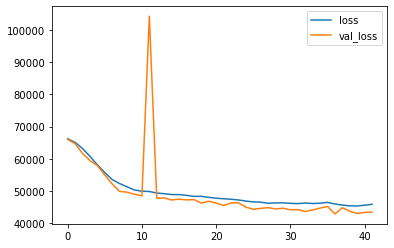

In [5]:
nombreDeNeurones = 20
batchNormalisation=True
dropout=True
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 100          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
if dropout:
    model.add( Dropout(0.2) ) 
if batchNormalisation:
    model.add( BatchNormalization() )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))

100 neurones

Epoch 1/20
342/342 [==============================] - 3s 6ms/step - loss: 45925.1562 - mae: 73.4352 - val_loss: 44121.0664 - val_mae: 73.0690
Epoch 2/20
342/342 [==============================] - 2s 6ms/step - loss: 41682.6289 - mae: 70.1842 - val_loss: 43695.5469 - val_mae: 76.3138
Epoch 3/20
342/342 [==============================] - 2s 6ms/step - loss: 41929.0156 - mae: 68.6719 - val_loss: 42927.7188 - val_mae: 66.6687
Epoch 4/20
342/342 [==============================] - 2s 6ms/step - loss: 42031.3242 - mae: 66.2130 - val_loss: 45252.7109 - val_mae: 70.1649
Epoch 5/20
342/342 [==============================] - 2s 6ms/step - loss: 42677.3086 - mae: 70.2501 - val_loss: 48112.1484 - val_mae: 73.4352
Epoch 6/20
342/342 [==============================] - 2s 6ms/step - loss: 43200.1367 - mae: 71.5415 - val_loss: 44063.0938 - val_mae: 68.9915
Epoch 7/20
342/342 [==============================] - 2s 6ms/step - loss: 42791.9258 - mae: 70.8131 - val_loss: 45302.9492 - val_mae: 71.9879
Epoch 

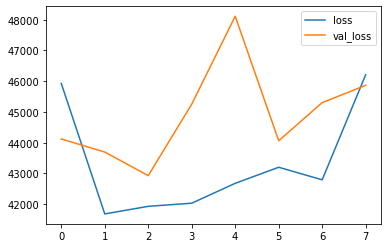

In [7]:
nombreDeNeurones = 100
batchNormalisation=False
dropout=False
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 20          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
if dropout:
    model.add( Dropout(0.2) ) 
if batchNormalisation:
    model.add( BatchNormalization() )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))

Epoch 1/100
342/342 [==============================] - 14s 34ms/step - loss: 65299.3281 - mae: 100.0598 - val_loss: 65547.4922 - val_mae: 107.5486
Epoch 2/100
342/342 [==============================] - 11s 32ms/step - loss: 61051.4258 - mae: 87.0601 - val_loss: 74743.0703 - val_mae: 137.1047
Epoch 3/100
342/342 [==============================] - 11s 32ms/step - loss: 56576.6836 - mae: 71.2928 - val_loss: 53262.8477 - val_mae: 69.0210
Epoch 4/100
342/342 [==============================] - 11s 32ms/step - loss: 52507.9414 - mae: 66.7387 - val_loss: 49134.6133 - val_mae: 85.5901
Epoch 5/100
342/342 [==============================] - 11s 33ms/step - loss: 50769.6836 - mae: 70.1049 - val_loss: 57665.7500 - val_mae: 93.3489
Epoch 6/100
342/342 [==============================] - 11s 32ms/step - loss: 50206.4023 - mae: 72.0026 - val_loss: 50436.5469 - val_mae: 72.9437
Epoch 7/100
342/342 [==============================] - 11s 33ms/step - loss: 50026.6836 - mae: 72.0867 - val_loss: 49566.6914 -

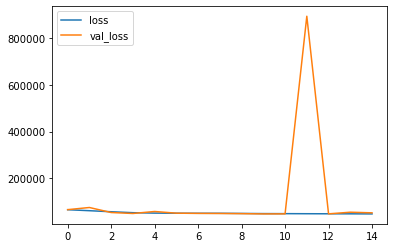

In [7]:
nombreDeNeurones = 100
batchNormalisation=True
dropout=False
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 100          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
if dropout:
    model.add( Dropout(0.2) ) 
if batchNormalisation:
    model.add( BatchNormalization() )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))

Epoch 1/20
342/342 [==============================] - 3s 7ms/step - loss: 51029.9648 - mae: 82.6000 - val_loss: 48663.5391 - val_mae: 79.3998
Epoch 2/20
342/342 [==============================] - 2s 7ms/step - loss: 46212.7695 - mae: 75.1486 - val_loss: 44001.6250 - val_mae: 71.5488
Epoch 3/20
342/342 [==============================] - 2s 7ms/step - loss: 44449.7969 - mae: 74.5508 - val_loss: 46288.1289 - val_mae: 75.1960
Epoch 4/20
342/342 [==============================] - 3s 7ms/step - loss: 43645.9141 - mae: 71.1870 - val_loss: 43618.4531 - val_mae: 67.4479
Epoch 5/20
342/342 [==============================] - 3s 8ms/step - loss: 42427.9453 - mae: 70.2518 - val_loss: 43242.7109 - val_mae: 69.0175
Epoch 6/20
342/342 [==============================] - 3s 7ms/step - loss: 43789.0898 - mae: 73.9434 - val_loss: 44893.9336 - val_mae: 71.6242
Epoch 7/20
342/342 [==============================] - 3s 7ms/step - loss: 46008.0039 - mae: 76.1331 - val_loss: 43183.8633 - val_mae: 70.8319
Epoch 

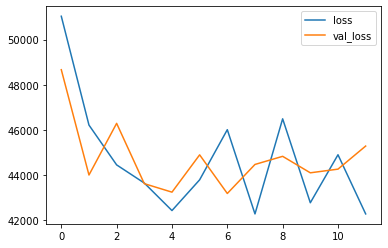

In [9]:
nombreDeNeurones = 100
batchNormalisation=False
dropout=True
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 20          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
if dropout:
    model.add( Dropout(0.2) ) 
if batchNormalisation:
    model.add( BatchNormalization() )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))

Epoch 1/20
342/342 [==============================] - 3s 6ms/step - loss: 64937.4961 - mae: 99.2904 - val_loss: 62555.6328 - val_mae: 93.8921
Epoch 2/20
342/342 [==============================] - 2s 6ms/step - loss: 60480.9531 - mae: 84.3326 - val_loss: 62790.1836 - val_mae: 99.9064
Epoch 3/20
342/342 [==============================] - 2s 6ms/step - loss: 56266.7383 - mae: 69.7464 - val_loss: 53890.4180 - val_mae: 68.8006
Epoch 4/20
342/342 [==============================] - 2s 6ms/step - loss: 52615.8555 - mae: 67.8314 - val_loss: 50033.0508 - val_mae: 74.4705
Epoch 5/20
342/342 [==============================] - 2s 6ms/step - loss: 51368.4570 - mae: 71.4965 - val_loss: 50287.6953 - val_mae: 69.7321
Epoch 6/20
342/342 [==============================] - 2s 7ms/step - loss: 51091.8320 - mae: 73.2013 - val_loss: 66557.5703 - val_mae: 90.4705
Epoch 7/20
342/342 [==============================] - 2s 7ms/step - loss: 50728.2305 - mae: 73.7009 - val_loss: 52547.5625 - val_mae: 90.1085
Epoch 

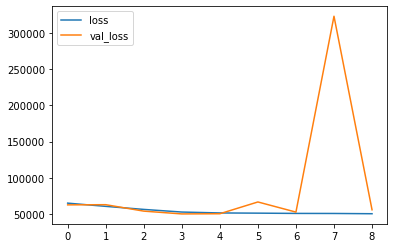

In [10]:
nombreDeNeurones = 100
batchNormalisation=True
dropout=True
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 20          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
if dropout:
    model.add( Dropout(0.2) ) 
if batchNormalisation:
    model.add( BatchNormalization() )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))